Notebook for preprocessing d3 datasets.

In [50]:
import os
import json
from os.path import join
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Download the bbbp dataset (csv)

In [5]:
df = pd.read_csv('galactica_raw/bbbp.csv')

In [6]:
df['outcome'] = df['p_np']

In [7]:
df.head()

,num,name,p_np,smiles,outcome
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,1
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,1
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,1
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,1
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,1


In [15]:
df.name.loc[df.name.str.isnumeric()] = 'Compound-'+df.name.loc[df.name.str.isnumeric()]

/tmp/ipykernel_3655676/2615518426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name.loc[df.name.str.isnumeric()] = 'Compound-'+df.name.loc[df.name.str.isnumeric()]


# Download the raw tox21 dataset (csv)

In [20]:
df = pd.read_csv('galactica_raw/tox21.csv')
smiles = df['smiles']
d = df.drop(columns=['smiles']).set_index('mol_id')

In [21]:
d.head()

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
mol_id,,,,,,,,,,,,
TOX3021,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TOX3020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
TOX3024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
TOX3027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
TOX20800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# counts for each toxin
print(d.sum(axis=0))

NR-AR            309.0
NR-AR-LBD        237.0
NR-AhR           768.0
NR-Aromatase     300.0
NR-ER            793.0
NR-ER-LBD        350.0
NR-PPAR-gamma    186.0
SR-ARE           942.0
SR-ATAD5         264.0
SR-HSE           372.0
SR-MMP           918.0
SR-p53           423.0
dtype: float64


In [27]:
# counts for each compound
d.sum(axis=1).value_counts()

0.0    4959
1.0    1398
2.0     670
3.0     404
4.0     208
5.0     107
6.0      56
7.0      24
8.0       4
9.0       1
dtype: int64

# Uniprot
- First download the data (maybe the swissprot subset).
- Use [this link](https://www.uniprot.org/uniprotkb?facets=reviewed:true&query=*) and make sure to download the sequences + keywords. 
- Here, we'll assume the data was downloaded in tsv format

In [6]:
df = pd.read_csv('galactica_raw/uniprot-download_true_fields_accession_2Cid_2Cprotein_name_2Csequenc-2022.12.30-22.28.29.40.tsv', sep='\t')

In [10]:
df.head()

,Entry,Entry Name,Protein names,Sequence,Keywords
0,A0A023I7E1,ENG1_RHIMI,"Glucan endo-1,3-beta-D-glucosidase 1 (Endo-1,3...",MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3D-structure;Carbohydrate metabolism;Cell wall...
1,A0A024B7W1,POLG_ZIKVF,Genome polyprotein [Cleaved into: Capsid prote...,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,3D-structure;4Fe-4S;Activation of host autopha...
2,A0A024SC78,CUTI1_HYPJR,Cutinase (EC 3.1.1.74),MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3D-structure;Disulfide bond;Hydrolase;Secreted...
3,A0A024SH76,GUX2_HYPJR,"Exoglucanase 2 (EC 3.2.1.91) (1,4-beta-cellobi...",MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,Carbohydrate metabolism;Cellulose degradation;...
4,A0A026W182,ORCO_OOCBI,Odorant receptor coreceptor,MMKMKQQGLVADLLPNIRVMKTFGHFVFNYYNDNSSKYLHKVYCCV...,Behavior;Cell membrane;Glycoprotein;Membrane;O...


In [11]:
keywords = df['Keywords'].str.split(';').str.strip().value_counts()

In [36]:
keywords = (
    df['Keywords']
    .str.split(';')  # convert concatenated keywords to list
)

In [37]:
keyword_counts = (
    keywords
    .explode()  # repeat each keyword in the list as a row
    .str.strip()
    .value_counts()
)

In [38]:
keyword_counts

Reference proteome     323503
Cytoplasm              163128
Metal-binding          119969
Membrane               116425
Nucleotide-binding     101708
                        ...  
Bradyzoite                  1
Thiamine catabolism         1
Nucleomorph                 1
Host lysosome               1
Capsule                     1
Name: Keywords, Length: 1178, dtype: int64

In [59]:
top_keywords = keyword_counts.head(16).index.tolist()[1:]

In [60]:
top_keywords

['Cytoplasm',
 'Metal-binding',
 'Membrane',
 'Nucleotide-binding',
 'Transferase',
 'ATP-binding',
 'Transmembrane',
 'Transmembrane helix',
 'Hydrolase',
 'Cell membrane',
 'Transport',
 'RNA-binding',
 'Ribonucleoprotein',
 'Ribosomal protein',
 'Phosphoprotein']

In [61]:
coocurrences = np.zeros((len(top_keywords), len(top_keywords)))
for i, keyword1 in tqdm(enumerate(top_keywords)):
    for j, keyword2 in enumerate(top_keywords):
        coocurrences[i, j] = (
            df['Keywords'].str.contains(keyword1)
            & df['Keywords'].str.contains(keyword2)
            ).sum()

15it [01:21,  5.43s/it]


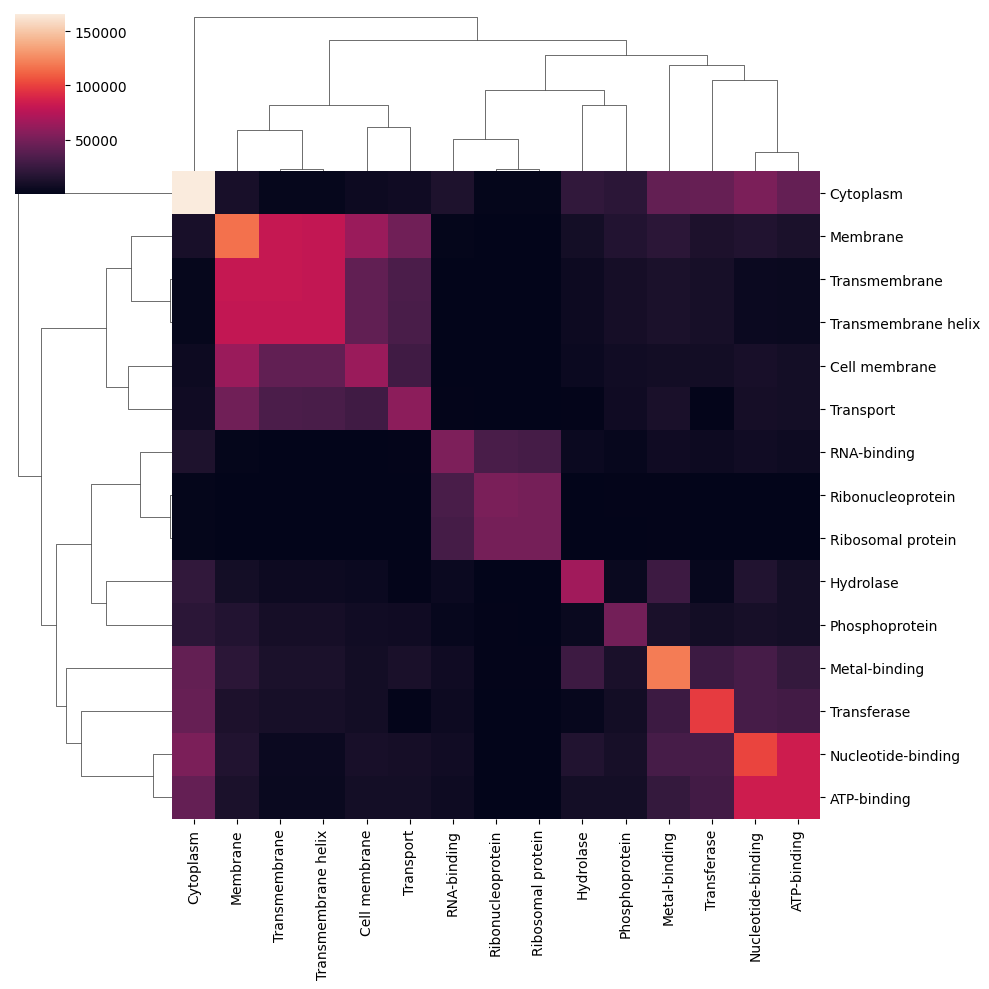

In [63]:
sns.clustermap(coocurrences, annot=False, xticklabels=top_keywords, yticklabels=top_keywords)
plt.show()

Reasonably popular but non-occuring keywords whos up in different blocks in this plot.

For example, `Cytoplasm` and `Membrane`. Another example is `RNA-binding` and `ATP-binding`.

In [95]:
def save_tsv(df, keyword1='Cytoplasm', keyword2='Membrane', max_size=1000):
    d1 = df[df['Keywords'].str.contains(keyword1) & ~(
        df['Keywords'].str.contains(keyword2).astype(bool))]
    d2 = df[~(df['Keywords'].str.contains(keyword1)).astype(
        bool) & df['Keywords'].str.contains(keyword2)]
    n = min(d1.shape[0], d2.shape[0], max_size)
    d1 = d1.sample(n=n, random_state=42)
    d2 = d2.sample(n=n, random_state=42)
    d = pd.concat([d1, d2])
    d['key1'] = 1
    d['key1'].iloc[n:] = 0
    d = d.sample(frac=1, random_state=42)[
        ['Protein names', 'Sequence', 'key1']]
    d.to_csv(f'galactica_raw/{keyword1}_{keyword2}.tsv', sep='\t', index=False)


save_tsv(df, 'Cytoplasm', 'Membrane')
save_tsv(df, 'RNA-binding', 'ATP-binding')


/tmp/ipykernel_752716/2718516760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['key1'].iloc[n:] = 0
/tmp/ipykernel_752716/2718516760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['key1'].iloc[n:] = 0
